# Investigate Regression Output
After running EBUS-Extraction to pull out the given upwelling system, I ran the climate-correlation.py script to correlate a near-offshore region of the EBUS with specific climate indices. This saves some CSV files with regression results that will now be interpreted here.

In [21]:
# Numerics
import numpy as np
import pandas as pd
import xarray as xr

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [22]:
ens = ['001', '002', '009', '010', '011',
       '012', '013', '014', '015', '016',
       '017', '018', '019', '020', '021',
       '022', '023', '024', '025', '026',
       '027', '028', '029', '030', '031',
       '032', '033', '034', '035', '101',
       '102', '103', '104', '105']

In [23]:
EBU = 'bencs'
fileDir = '/glade/u/home/rbrady/projects/EBUS_BGC_Variability/data/processed/' + EBU + '/'

df_enso = pd.DataFrame.from_csv(fileDir + 'smoothed_fgco2_vs_enso_' + EBU)
df_pdo = pd.DataFrame.from_csv(fileDir + 'smoothed_fgco2_vs_pdo_' + EBU)
if EBU == 'cancs' or EBU == 'bencs':
    df_amo = pd.DataFrame.from_csv(fileDir + 'smoothed_fgco2_vs_amo_' + EBU)
    df_nao = pd.DataFrame.from_csv(fileDir + 'smoothed_fgco2_vs_nao_' + EBU)
    df_sam = pd.DataFrame.from_csv(fileDir + 'smoothed_fgco2_vs_sam_' + EBU)

In [24]:
# Drop a NaN row from a mistake in the code.
if EBU == 'calcs':
    df_enso = df_enso.drop(df_enso.index[34])
    df_pdo = df_pdo.drop(df_pdo.index[34])
    df_npo = df_npo.drop(df_npo.index[34])

# Change out the indices to ensemble numbers
if EBU == 'cancs' or EBU == 'bencs':
    df_enso.index = ens
    df_pdo.index = ens
    df_amo.index = ens
    df_nao.index = ens
    df_sam.index = ens

In [25]:
# Remove insignificant results
if EBU == 'cancs' or EBU == 'bencs':
    df_enso = df_enso[df_enso['P-Value'] < 0.05]
    df_pdo = df_pdo[df_pdo['P-Value'] < 0.05]
    df_amo = df_amo[df_amo['P-Value'] < 0.05]
    df_nao = df_nao[df_nao['P-Value'] < 0.05]
    df_sam = df_sam[df_sam['P-Value'] < 0.05]

In [26]:
def hist_plot(ax, data, climate_index):
    if EBU == 'cancs':
        color = 'y'
    elif EBU == 'bencs':
        color = 'k'
    elif EBU == 'calcs':
        color = 'b'
    elif EBU == 'humcs':
        color = 'r'
    sns.distplot(data, kde=False, color=color, norm_hist=False, bins=7)
    ax.set_title(climate_index + ' Correlation Distribution (N=34)', size='x-large')
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.xlabel('R Value', size=15)
    plt.ylim([0, 14])
    plt.xlim([-1, 1])
    plt.plot([0, 0], [0, 14], linewidth=1, color='k')

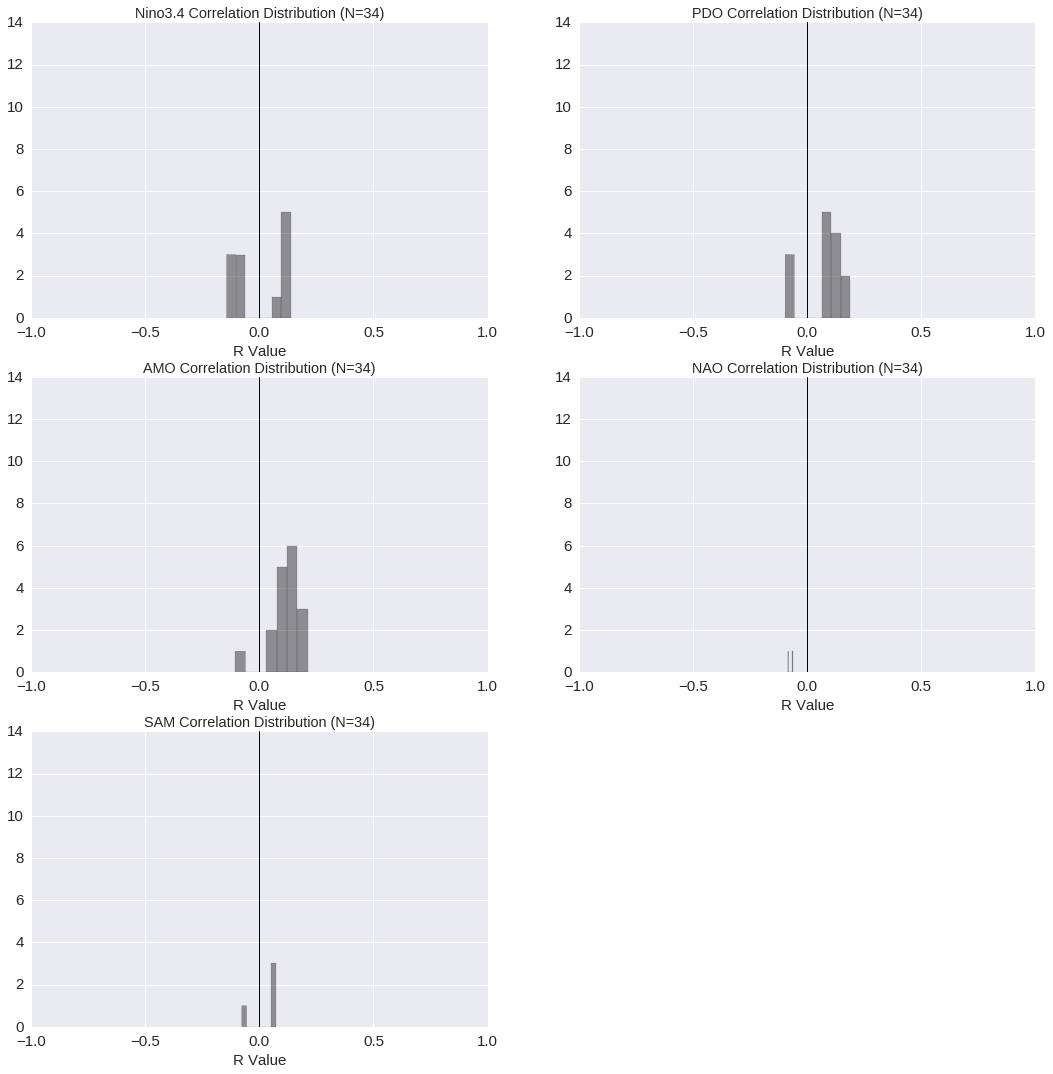

In [28]:
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(321)
hist_plot(ax1, df_enso['R Value'], 'Nino3.4')
ax2 = fig.add_subplot(322)
hist_plot(ax2, df_pdo['R Value'], 'PDO')
ax3 = fig.add_subplot(323)
hist_plot(ax3, df_amo['R Value'], 'AMO')
ax4 = fig.add_subplot(324)
hist_plot(ax4, df_nao['R Value'], 'NAO')
ax5 = fig.add_subplot(325)
hist_plot(ax5, df_sam['R Value'], 'SAM')
#plt.savefig("bencs-correlation-histograms.png")

# Outputting to LaTeX

In [30]:
#df_pdo = df_pdo.drop('P-Value', 1)
#print df_amo.round(2).to_latex()
np.mean(df_amo['Slope'].values).round(2)

0.20999999999999999